In [44]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns

`-` 데이터

In [8]:
norm_course = pd.read_excel("./kocw data/featured data/norm_course.xlsx", index_col = 0)
course_classed = pd.read_excel("./kocw data/featured data/course_classed.xlsx", index_col = 0)
university = pd.read_excel("./kocw data/featured data/university.xlsx", index_col = 0)
professor = pd.read_excel("./kocw data/featured data/professor.xlsx", index_col = 0)
charge = pd.read_excel("./kocw data/featured data/charge.xlsx", index_col = 0)

### 1. 로지스틱 회귀분석(국립/사립 분류)이 의미가 있을까?

In [9]:
pd.merge(university, norm_course).merge(course_classed)

,제공대학명,대학소재지(시/도),사립/국립 구분,강의코드,강의명,강의년도,강의학기,제공일자,교육분류
0,한경대학교,경기도,국립,1095582,대학수학1,2015,1,2015-08-30,수학ㆍ물리ㆍ천문ㆍ지리
1,한경대학교,경기도,국립,1128714,선형대수학,2015,2,2016-02-12,수학ㆍ물리ㆍ천문ㆍ지리
2,한경대학교,경기도,국립,1095568,공업수학1,2015,1,2015-08-30,수학ㆍ물리ㆍ천문ㆍ지리
3,한경대학교,경기도,국립,1095573,공업수학2,2015,1,2015-08-30,수학ㆍ물리ㆍ천문ㆍ지리
4,한경대학교,경기도,국립,1046254,미분적분학2,2014,2,2015-01-27,수학ㆍ물리ㆍ천문ㆍ지리
...,...,...,...,...,...,...,...,...,...
16809,사이버한국외국어대학교,서울특별시,사립,1342271,就職務日本語,2019,2,2019-12-02,언어ㆍ문학
16810,사이버한국외국어대학교,서울특별시,사립,1342300,실용 일본어 독해,2019,2,2019-12-02,언어ㆍ문학
16811,수원대학교,경기도,사립,1321627,글로벌 문화 소통과 통번역,2019,1,2018-02-05,언어ㆍ문학
16812,구미대학교,경상북도,사립,314869,Oplc 중급,2010,2,2011-07-27,언어ㆍ문학


In [32]:
course_count = norm_course.pivot_table(index = "제공대학명", values = "강의명", aggfunc = "count").reset_index().rename({"강의명" : "제공강의 수"}, axis = 1)
course_count

,제공대학명,제공강의 수
0,가천대학교,354
1,가톨릭관동대학교,1
2,가톨릭꽃동네대학교,9
3,가톨릭대학교,90
4,강남대학교,101
...,...,...
181,한양여자대학교,3
182,협성대학교,1
183,호남대학교,120
184,호서대학교,61


In [31]:
professor_count = professor.pivot_table(index = "제공대학명", values = "교수코드", aggfunc = "count").reset_index().rename({"교수코드" : "참여교수 수"}, axis = 1)
professor_count

,제공대학명,참여교수 수
0,가천대학교,191
1,가톨릭관동대학교,1
2,가톨릭꽃동네대학교,12
3,가톨릭대학교,44
4,강남대학교,35
...,...,...
181,한양여자대학교,1
182,협성대학교,1
183,호남대학교,62
184,호서대학교,28


In [34]:
df = university.merge(course_count).merge(professor_count)
df

,제공대학명,대학소재지(시/도),사립/국립 구분,제공강의 수,참여교수 수
0,한경대학교,경기도,국립,236,88
1,가천대학교,경기도,사립,354,191
2,단국대학교,경기도,사립,186,127
3,성균관대학교,서울특별시,사립,380,248
4,덕성여자대학교,서울특별시,사립,75,34
...,...,...,...,...,...
181,수도국제대학원대학교,서울특별시,국립,1,1
182,사이버한국외국어대학교,서울특별시,사립,13,12
183,수원대학교,경기도,사립,1,1
184,구미대학교,경상북도,사립,1,1


In [42]:
## features and target
X = df[["제공강의 수", "참여교수 수"]]
y = df["사립/국립 구분"]

## predictor
predictr = sklearn.linear_model.LogisticRegression()

## fitting
predictr.fit(X, y)

## predict
predictr.predict(X)

array(['사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사립',
       '사립', '사립', '사립', '사립', '사립', '사립', '사립', '사

In [47]:
predictr.coef_

array([[ 0.0012862 , -0.00174504]])

In [48]:
predictr.score(X, y)  ## 전부 사립으로 예측했음. 사립이 애초에 더 많음

0.8279569892473119

> 별로 의미있는 정보를 생성하지는 못할 것 같음! (그래도 할 수는 있음)

### 2. 시계열 자료 분석(연도 및 학기 별 제공강의와 참여교수 수)

In [85]:
norm_course

,강의코드,강의명,강의년도,강의학기,제공대학명,제공일자
0,1095582,대학수학1,2015,1,한경대학교,2015-08-30
1,1104074,수학1,2015,1,가천대학교,2015-09-14
2,1110603,미적분학,2015,1,단국대학교,2015-10-08
3,1112400,공학수학1,2015,1,성균관대학교,2015-11-02
4,1118072,정수론,2015,2,덕성여자대학교,2015-12-16
...,...,...,...,...,...,...
16809,1430653,다변량통계학(II),2021,2,부산대학교,2015-01-08
16810,1443736,AI를 위한 딥러닝,2022,1,중앙대학교,2016-04-07
16811,1445911,회귀분석(II),2021,2,부산대학교,2017-10-17
16812,820840,과학사 이해,2013,2,신라대학교,2012-02-29


In [64]:
## Query로 쓰자면 세 열을 select하고, 강의년도와 강의학기를 엮은 튜플에 대하여 count하면 될 것 같습니다.
## SELECT 강의년도, 강의학기, COUNT(*) FROM norm_course ORDER BY 강의년도, 강의학기
## 해봐야 알 것 같음
norm_course[["강의년도", "강의학기", "강의코드"]].pivot_table(index = ["강의년도", "강의학기"], values = "강의코드", aggfunc = "count").reset_index().rename({"강의코드" : "제공강의 수"}, axis = 1)

,강의년도,강의학기,제공강의 수
0,2007,1,1
1,2009,1,1414
2,2009,2,85
3,2010,1,179
4,2010,2,205
5,2011,1,431
6,2011,2,466
7,2012,1,714
8,2012,2,724
9,2013,1,771


<Axes: >

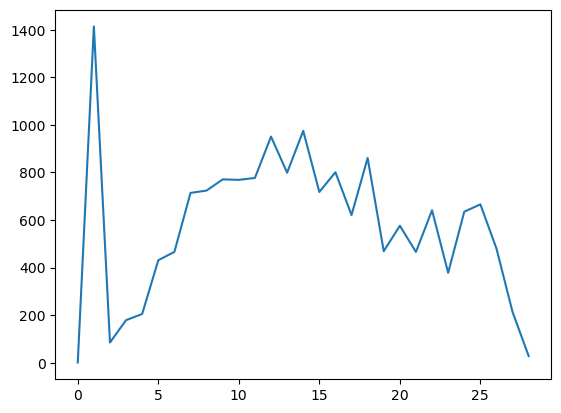

In [78]:
norm_course[["강의년도", "강의학기", "강의코드"]].pivot_table(index = ["강의년도", "강의학기"], values = "강의코드", aggfunc = "count").reset_index().rename({"강의코드" : "제공강의 수"}, axis = 1)\
["제공강의 수"].plot()

강의 수가 증가하질 않음. 왜그럴까?

> K-MOOC 운영 개시일 : 2015년 10월. 실제로 2015년 2학기를 기점으로 강의 수가 내려가는 추세인 것을 확인할 수 있음. 대학 강의 제공 플랫폼이 분할되며 KOCW에 대한 의존도가 줄어들었기 때문에 발생한 현상이라고 여겨짐.

In [84]:
[df for i, df in norm_course.merge(charge).merge(professor).groupby(["강의년도", "강의학기"])][1]

,강의코드,강의명,강의년도,강의학기,제공대학명,제공일자,교수코드,담당교수명,담당분야
186,320015,수학,2009,1,전북대학교,2011-09-14,105,정수미,자연계열
208,294112,정보사회와 통계 1,2009,1,목포대학교,2011-01-26,133,조성의,자연계열
209,296926,미분방정식,2009,1,덕성여자대학교,2011-02-25,10,최성우,자연계열
210,296953,수치해석개론2,2009,1,덕성여자대학교,2011-02-25,10,최성우,자연계열
211,297453,미적분학,2009,1,호남대학교,2011-02-28,134,백란,자연계열
...,...,...,...,...,...,...,...,...,...
17072,150986,철근콘크리트,2009,1,울산대학교,2016-08-01,8788,박순규,공학계열
17073,160495,한국건축사,2009,1,울산대학교,2016-08-24,8789,강영환,공학계열
17182,150980,건설프로젝트관리,2009,1,울산대학교,2021-07-22,8791,이규성,공학계열
17183,150984,건축음향과 빛,2009,1,울산대학교,2021-08-09,8790,유호천,공학계열
